### Dataset Overview


In [2]:
#Imports
import os
import numpy as np
from PIL import Image
import random
from collections import Counter
import matplotlib.pyplot as plt


In [3]:
#dataset loading
DATA_DIR = "african_plums_dataset/african_plums"

### Class distribution of dataset

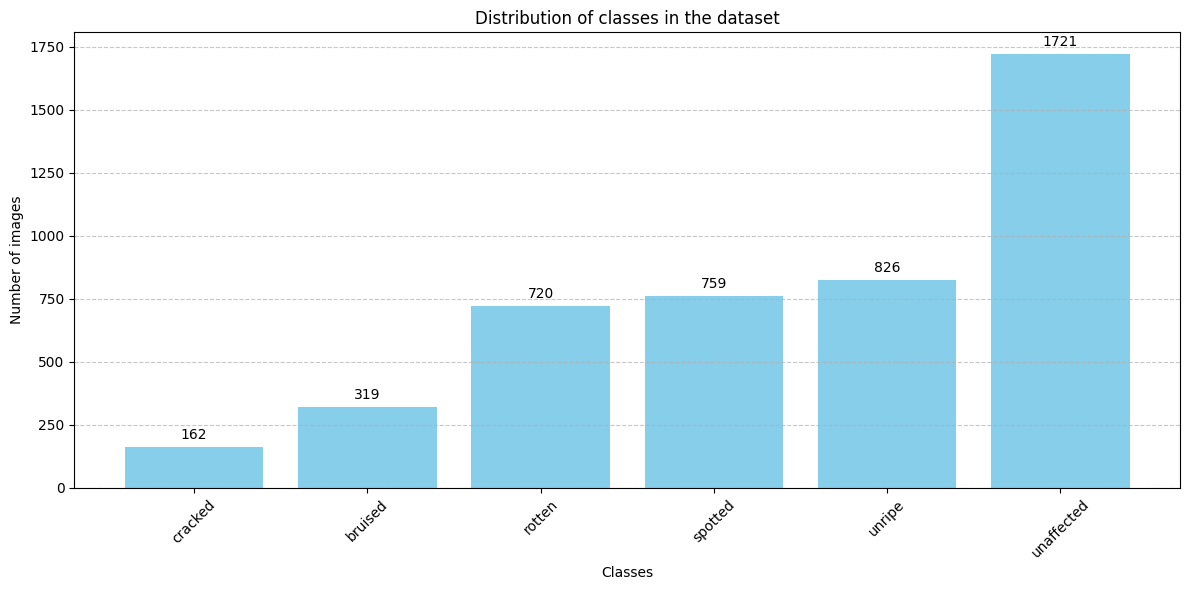

In [5]:
# Load image paths and labels from the directory structure
image_paths = []
labels = []

for label in os.listdir(DATA_DIR):
    label_dir = os.path.join(DATA_DIR, label)
    if os.path.isdir(label_dir):
        label_images = [os.path.join(label_dir, img) for img in os.listdir(label_dir)]
        image_paths.extend(label_images)
        labels.extend([label] * len(label_images))
        
# Count occurrences of each label
label_counts = Counter(labels)
sorted_labels = sorted(label_counts.keys(), key=lambda x: label_counts[x], reverse=False)
sorted_counts = [label_counts[label] for label in sorted_labels]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_labels, sorted_counts, color='skyblue')

# Add counts on top of bars
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 20, str(count), ha='center', va='bottom')

# Customize the plot
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.title("Distribution of classes in the dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observations
- The dataset shows a significant class imbalance, with the "unaffected" class dominating at 1,721 images, while minority classes like "cracked" and "bruised" have only 162 and 319 images respectively. This imbalance may lead to model bias, favoring the majority class and resulting in poor performance on underrepresented classes. Middle-sized classes such as "unripe" (826), "spotted" (759), and "rotten" (720) are more balanced among themselves but still much smaller than the dominant class. To ensure robust model performance, strategies such as downsampling the majority class, upsampling or augmenting minority classes, or applying class-weighted loss functions are necessary.

### Viewing some images per class

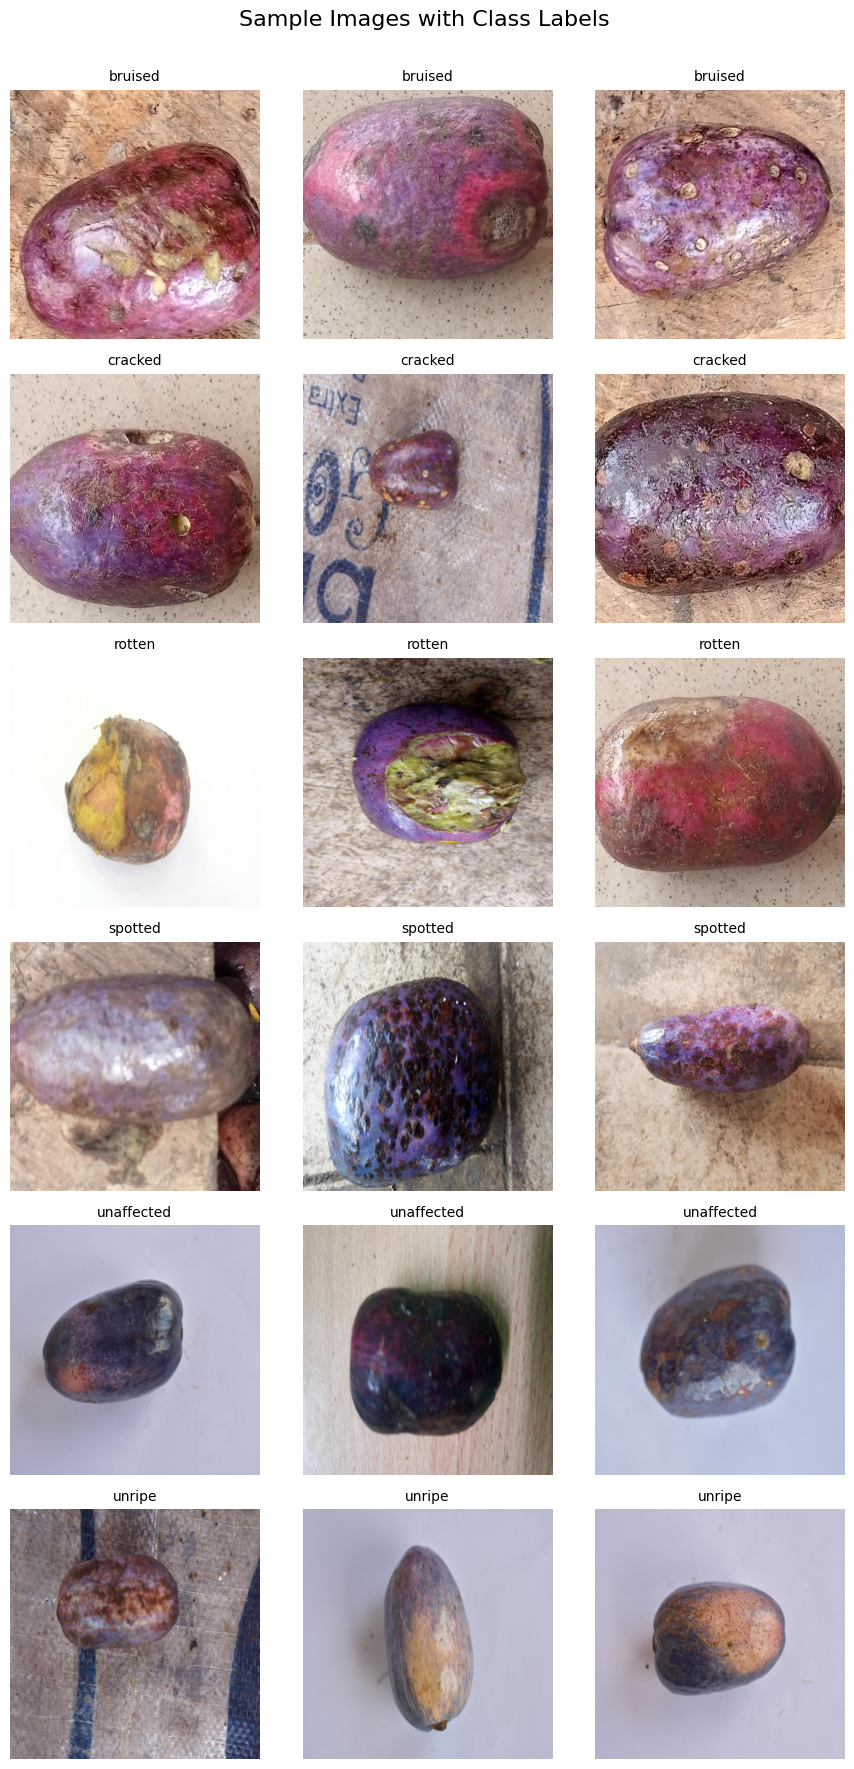

In [8]:

# Number of images per class to display
NUM_IMAGES = 3

# Get class names (folders)
class_names = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]

# Set up the plot
plt.figure(figsize=(NUM_IMAGES * 3, len(class_names) * 3))

for class_idx, class_name in enumerate(sorted(class_names)):
    class_dir = os.path.join(DATA_DIR, class_name)
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    selected_images = random.sample(images, min(NUM_IMAGES, len(images)))
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(class_dir, img_name)
        
        try:
            img = Image.open(img_path)
            plt.subplot(len(class_names), NUM_IMAGES, class_idx * NUM_IMAGES + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name, fontsize=10)  # Title above each image
        except Exception as e:
            print(f"Could not open {img_path}: {e}")

plt.suptitle("Sample Images with Class Labels \n\n", fontsize=16)
plt.tight_layout()
plt.show()


#### Detecting duplicates

In [10]:
# !pip install imagehash pillow


In [11]:

import imagehash
from collections import defaultdict

hashes = defaultdict(list)

for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)
    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)
        try:
            img = Image.open(fpath).convert('RGB')
            h = imagehash.phash(img)
            hashes[str(h)].append(fpath)
        except Exception as e:
            print(f"Error processing {fpath}: {e}")

# Show duplicates
for h, files in hashes.items():
    if len(files) > 1:
        print(f"\nDuplicate group [{h}]:")
        for f in files:
            print("  ", f)



Duplicate group [aedcfc6890914b1e]:
   african_plums_dataset/african_plums/cracked/cracked_plum_102.png
   african_plums_dataset/african_plums/rotten/rotten_plum_376.png

Duplicate group [ea3791e0970fda28]:
   african_plums_dataset/african_plums/cracked/cracked_plum_79.png
   african_plums_dataset/african_plums/cracked/cracked_plum_29.png

Duplicate group [e87d95840a95fc6a]:
   african_plums_dataset/african_plums/cracked/cracked_plum_45.png
   african_plums_dataset/african_plums/cracked/cracked_plum_122.png

Duplicate group [ea7c25c0c39f8dc8]:
   african_plums_dataset/african_plums/cracked/cracked_plum_51.png
   african_plums_dataset/african_plums/rotten/rotten_plum_105.png

Duplicate group [ff36c0e0929f8a34]:
   african_plums_dataset/african_plums/cracked/cracked_plum_86.png
   african_plums_dataset/african_plums/cracked/cracked_plum_104.png

Duplicate group [cf47304e959197e2]:
   african_plums_dataset/african_plums/cracked/cracked_plum_92.png
   african_plums_dataset/african_plums/c

#### Observations
-We can see that there are a lot of duplicate images in the same class and some overlap with other classes

### Visualizing duplicate images

In [12]:
#viewing duplicate images

def show_duplicates_side_by_side(hashes, max_groups=5):
    """
    Display up to `max_groups` of image duplicates side by side.
    """
    shown = 0
    for h, files in hashes.items():
        if len(files) > 1:
            print(f"\nDuplicate group [{h}] with {len(files)} images:")
            for f in files:
                print("  ", f)

            # Plot side by side
            plt.figure(figsize=(4 * len(files), 4))
            for idx, img_path in enumerate(files):
                try:
                    img = Image.open(img_path)
                    plt.subplot(1, len(files), idx + 1)
                    plt.imshow(img)
                    plt.axis('off')
                    plt.title(os.path.basename(img_path), fontsize=8)
                except Exception as e:
                    print(f"Error displaying {img_path}: {e}")
            plt.suptitle(f"Duplicate Group {shown + 1} - Hash: {h}", fontsize=12)
            plt.tight_layout()
            plt.show()

            shown += 1
            if shown >= max_groups:
                break



Duplicate group [aedcfc6890914b1e] with 2 images:
   african_plums_dataset/african_plums/cracked/cracked_plum_102.png
   african_plums_dataset/african_plums/rotten/rotten_plum_376.png


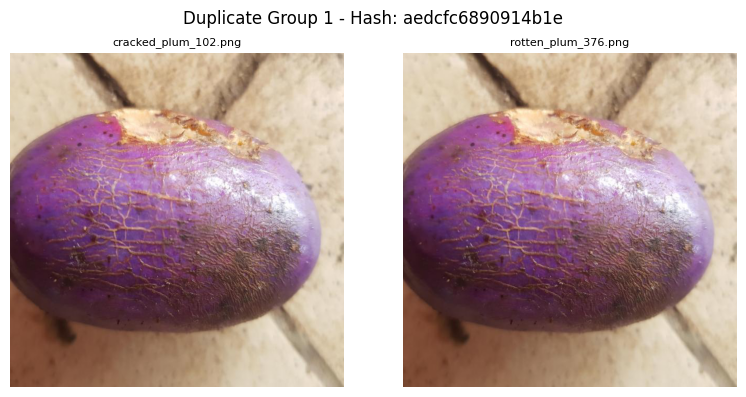


Duplicate group [ea3791e0970fda28] with 2 images:
   african_plums_dataset/african_plums/cracked/cracked_plum_79.png
   african_plums_dataset/african_plums/cracked/cracked_plum_29.png


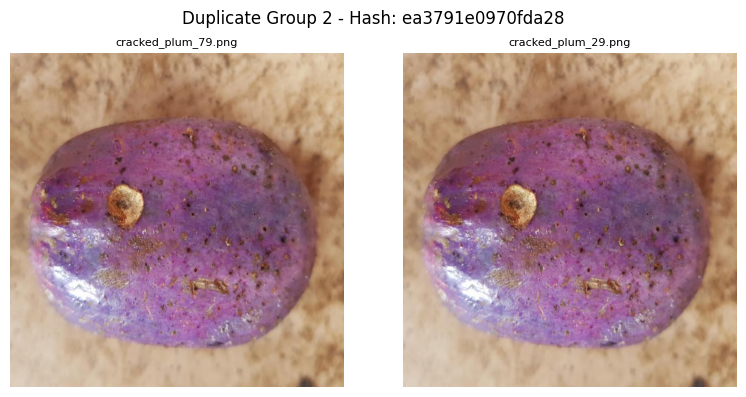


Duplicate group [e87d95840a95fc6a] with 2 images:
   african_plums_dataset/african_plums/cracked/cracked_plum_45.png
   african_plums_dataset/african_plums/cracked/cracked_plum_122.png


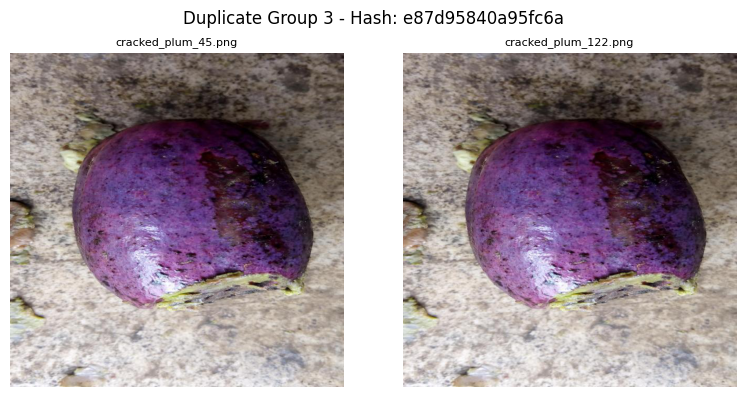

In [13]:
show_duplicates_side_by_side(hashes, max_groups=3)  # show first 3 groups


In [14]:
#function to delete duplicates
def auto_delete_duplicates(hashes):
    deleted = []
    kept = []

    for h, files in hashes.items():
        if len(files) > 1:
            # Keep the first image, delete the rest
            kept.append(files[0])
            for f in files[1:]:
                try:
                    os.remove(f)
                    deleted.append(f)
                    print(f"🗑️ Deleted: {f}")
                except Exception as e:
                    print(f"❌ Error deleting {f}: {e}")

    print(f"\n✅ Done. Kept {len(kept)} representative images.")
    print(f"🗑️ Deleted {len(deleted)} duplicates.")
    return kept, deleted


In [15]:
kept_files, deleted_files = auto_delete_duplicates(hashes)


🗑️ Deleted: african_plums_dataset/african_plums/rotten/rotten_plum_376.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_29.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_122.png
🗑️ Deleted: african_plums_dataset/african_plums/rotten/rotten_plum_105.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_104.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_7.png
🗑️ Deleted: african_plums_dataset/african_plums/rotten/rotten_plum_85.png
🗑️ Deleted: african_plums_dataset/african_plums/spotted/spotted_plum_531.png
🗑️ Deleted: african_plums_dataset/african_plums/unaffected/unaffected_plum_762.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_91.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_33.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_108.png
🗑️ Deleted: african_plums_dataset/african_plums/cracked/cracked_plum_47.png
🗑️ Del

#### Observations
-We can see that 1514 images were deleted because they were duplicated 

#### Class distribution after deleting duplicates

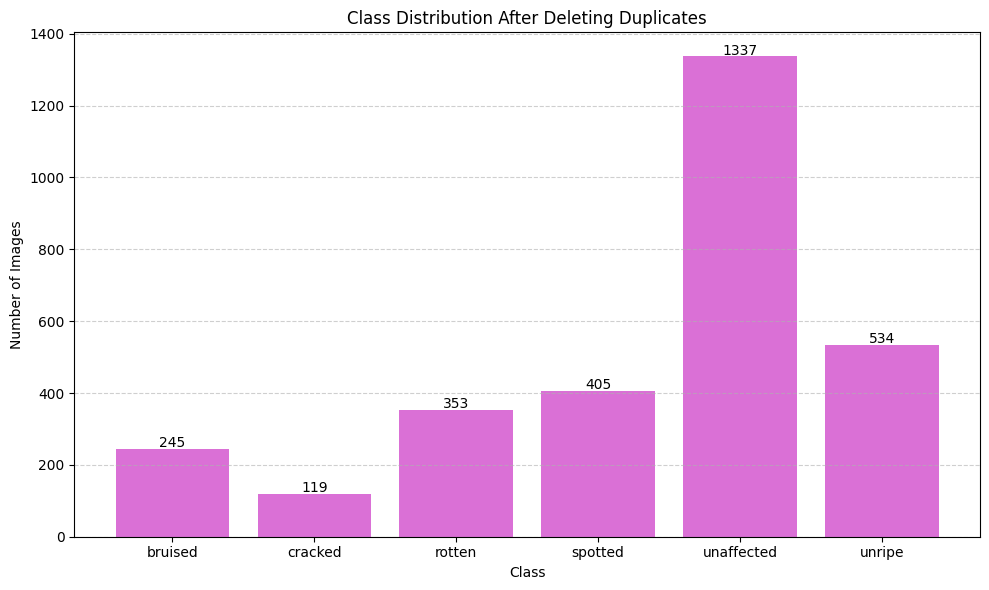

In [17]:


# Re-scan the directory after deletion
labels = []
for class_name in os.listdir(DATA_DIR):
    class_dir = os.path.join(DATA_DIR, class_name)
    if os.path.isdir(class_dir):
        count = len([
            f for f in os.listdir(class_dir)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        labels.extend([class_name] * count)

# Count per class
label_counts = Counter(labels)
sorted_labels = sorted(label_counts.keys())
sorted_counts = [label_counts[l] for l in sorted_labels]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_labels, sorted_counts, color='orchid')
for bar, count in zip(bars, sorted_counts):
    plt.text(bar.get_x() + bar.get_width()/2, count + 5, str(count), ha='center')
plt.title("Class Distribution After Deleting Duplicates")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Observations
-All classes experienced a reduction, confirming that duplicates were present across all categories. The new class distribution is still imbalanced but more reliable with the unaffected class as the majority class and cracked class as the minority class.

In [18]:
#Saving cleaned dataset after duplicate removal
import shutil

SOURCE_DIR = "african_plums_dataset/african_plums"
DEST_DIR = "cleaned_african_plums_dataset"

os.makedirs(DEST_DIR, exist_ok=True)

for class_name in os.listdir(SOURCE_DIR):
    src_class_dir = os.path.join(SOURCE_DIR, class_name)
    dst_class_dir = os.path.join(DEST_DIR, class_name)

    if os.path.isdir(src_class_dir):
        os.makedirs(dst_class_dir, exist_ok=True)
        for fname in os.listdir(src_class_dir):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                src_path = os.path.join(src_class_dir, fname)
                dst_path = os.path.join(dst_class_dir, fname)
                shutil.copy2(src_path, dst_path)

print(f"\n✅ Cleaned dataset saved to: {DEST_DIR}")



✅ Cleaned dataset saved to: cleaned_african_plums_dataset


### Detect Mislabelled Images 

In [20]:
# Import necessary modules from torchvision and torch
import torchvision.transforms as transforms
import torchvision.models as models
import torch
from torchvision.io import read_image


# Select GPU if available, otherwise fall back to CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the pre-trained EfficientNet-B0 model and set it to evaluation mode
model = models.efficientnet_b0(pretrained=True).to(device).eval()

# Define the preprocessing pipeline:
# Resize images to 224x224 and convert them to a tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to extract image embeddings using the EfficientNet feature extractor
def extract_embedding(img_path):
    try:
        # Open the image and ensure it has 3 RGB channels
        img = Image.open(img_path).convert("RGB")

        # Apply preprocessing and add batch dimension
        img = transform(img).unsqueeze(0).to(device)

        # Disable gradient computation for inference
        with torch.no_grad():
            # Extract features and perform global average pooling
            feat = model.features(img).squeeze().mean(dim=(1, 2))

        # Return the feature vector as a NumPy array
        return feat.cpu().numpy()

    except:
        # Return None if any error occurs (e.g., corrupted image)
        return None


/Applications/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Detect Empty or Near-Empty Images

In [22]:


# Function to detect near-empty (almost blank) images using pixel intensity variation
def is_blank(img_path, threshold=10):
    try:
        # Convert image to grayscale to simplify analysis
        img = Image.open(img_path).convert('L')
        img_array = np.array(img)

        # If the standard deviation of pixel intensities is very low,
        # the image is likely blank or near-empty (e.g., all white or black)
        if img_array.std() < threshold:
            return True
    except:
        # If image cannot be processed, ignore and move on
        pass
    return False

# List to store paths of blank or near-empty images
blank_images = []

# Loop over each class directory in the dataset
for class_name in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_name)
    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)
        # Check if the image is near-blank and add to the list
        if is_blank(fpath):
            blank_images.append(fpath)

# Output the results
print(f"\nFound {len(blank_images)} near-empty or blank images:")
for path in blank_images:
    print("  ", path)



Found 0 near-empty or blank images:


#### Observations
-This result  indicates that all the images in the dataset contain sufficient pixel intensity variation — meaning none are completely blank, all-white, all-black, or too uniform to be useful. This is a positive outcome, as it confirms that the dataset doesn't include visually empty or corrupted files, which could otherwise mislead the model or introduce noise during training. It suggests good image quality in terms of non-emptiness, so no additional filtering is needed.

### t-SNE Visualization by Class

/Applications/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


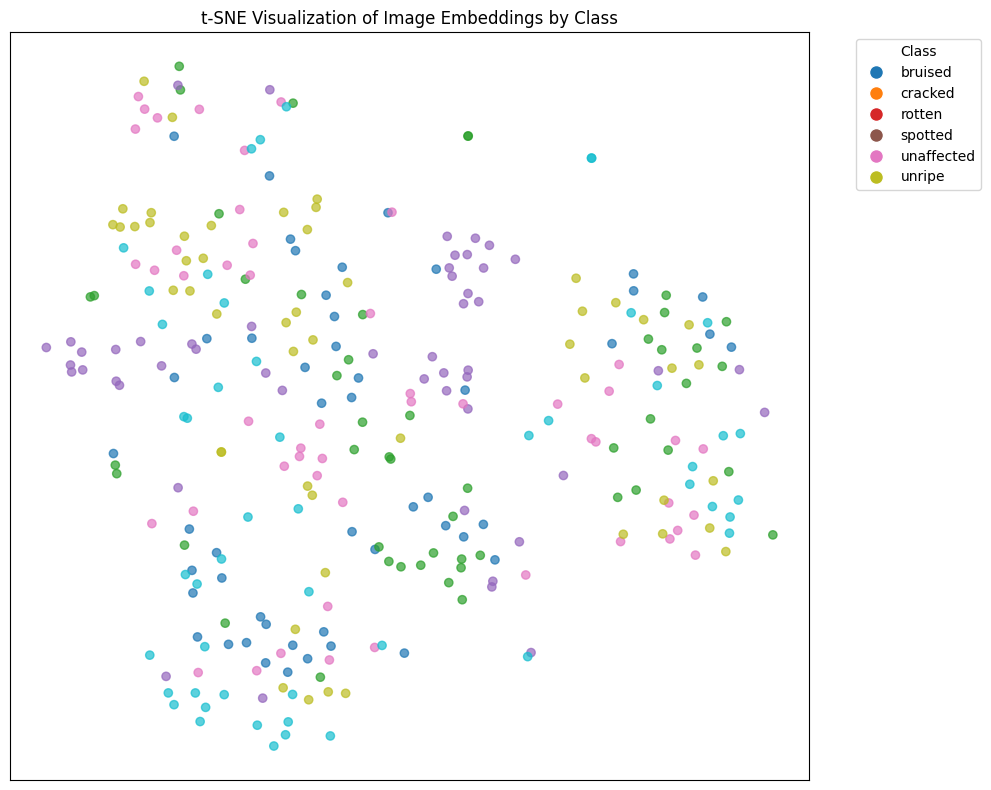

In [24]:

from sklearn.manifold import TSNE # Import t-SNE for dimensionality reduction and visualization of high-dimensional data


# Step 1: Load model and set transform
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = models.efficientnet_b0(pretrained=True).eval().to(device)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Step 2: Load images and extract features
DATA_DIR = "cleaned_african_plums_dataset"
embeddings = []
image_labels = []
label_to_index = {}

for idx, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
    class_dir = os.path.join(DATA_DIR, class_name)
    if os.path.isdir(class_dir):
        label_to_index[class_name] = idx
        for fname in os.listdir(class_dir)[:50]:  # Limit per class
            fpath = os.path.join(class_dir, fname)
            try:
                img = Image.open(fpath).convert('RGB')
                img = transform(img).unsqueeze(0).to(device)
                with torch.no_grad():
                    feat = model.features(img).squeeze().mean(dim=(1, 2))  # Global average pool
                embeddings.append(feat.cpu().numpy())
                image_labels.append(idx)
            except:
                continue

# Step 3: Run t-SNE and plot
X = np.array(embeddings)
X_embedded = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

# Step 4: Plot with class names
index_to_label = {v: k for k, v in label_to_index.items()}
class_names = [index_to_label[i] for i in image_labels]

unique_classes = sorted(set(class_names))
color_map = {label: i for i, label in enumerate(unique_classes)}
colors = [color_map[label] for label in class_names]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap='tab10', alpha=0.7)

handles = [plt.Line2D([], [], marker='o', color='w',
                      markerfacecolor=scatter.cmap(i / len(unique_classes)),
                      markersize=10) for i in range(len(unique_classes))]
plt.legend(handles, unique_classes, title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("t-SNE Visualization of Image Embeddings by Class")
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


#### Obervations
-This t-SNE plot shows the 2D projection of image embeddings colored by class, allowing us to visually assess how well the different plum categories are separated. The plot reveals significant overlap among most classes, particularly between “bruised,” “spotted,” and “unaffected,” indicating high visual similarity and potential classification ambiguity. Some compact clusters exist, such as those for “unripe” and “cracked,” suggesting better separability for those classes. Overall, the dispersion and mixing of points highlight the challenge of distinguishing certain classes based solely on visual features and support the earlier observation from the similarity matrix that some categories may require advanced modeling techniques or refined labels.

### Class similarity matrix

In [26]:
from sklearn.metrics.pairwise import cosine_similarity  # For computing similarity between vectors
import pandas as pd  # For tabular representation of the similarity matrix

# Step 1: Compute average (mean) feature embedding for each class
class_vectors = {}
for class_name in sorted(label_to_index.keys()):
    class_dir = os.path.join(DATA_DIR, class_name)
    feats = []

    # Extract embeddings for up to 30 images per class to limit computation
    for fname in os.listdir(class_dir)[:30]:
        fpath = os.path.join(class_dir, fname)
        feat = extract_embedding(fpath)
        if feat is not None:
            feats.append(feat)

    # Compute the average embedding for the class
    if feats:
        class_vectors[class_name] = np.mean(feats, axis=0)

# Step 2: Prepare the list of class names and their corresponding mean embeddings
names = list(class_vectors.keys())
vectors = [class_vectors[name] for name in names]

# Step 3: Compute the cosine similarity matrix between class vectors
similarity_matrix = cosine_similarity(vectors)

# Step 4: Convert the similarity matrix to a pandas DataFrame for readability
df_sim = pd.DataFrame(similarity_matrix, index=names, columns=names)

# Step 5: Display the similarity matrix rounded to 2 decimal places
print("\nClass Similarity Matrix (Cosine):")
print(df_sim.round(2))



Class Similarity Matrix (Cosine):
            bruised  cracked  rotten  spotted  unaffected  unripe
bruised        1.00     0.95    0.93     0.97        0.94    0.96
cracked        0.95     1.00    0.92     0.96        0.93    0.91
rotten         0.93     0.92    1.00     0.93        0.88    0.86
spotted        0.97     0.96    0.93     1.00        0.96    0.94
unaffected     0.94     0.93    0.88     0.96        1.00    0.93
unripe         0.96     0.91    0.86     0.94        0.93    1.00


#### Obervations
-The Class Similarity Matrix reveals that most plum classes are highly similar in visual appearance, with cosine similarities above 0.90, indicating potential challenges for model separation. Particularly, "bruised" and "spotted" (0.97) show significant visual overlap, which may justify merging or require robust feature extraction to distinguish them. In contrast, "rotten" and "unripe" (0.86) are more distinct, suggesting clearer boundaries. Overall, these results imply the need for fine-tuned deep learning models, possibly with attention mechanisms, and careful consideration of class definitions or augmentation strategies to handle subtle differences.